# Density of Floating Point Numbers

This notebook enumerates all possible floating point numbers in a floating point system and shows them in a plot to illustrate their density.

In [1]:
import matplotlib.pyplot as pt
import numpy as np

[ 0.125      0.1328125  0.140625   0.1484375  0.15625    0.1640625
  0.171875   0.1796875  0.1875     0.1953125  0.203125   0.2109375
  0.21875    0.2265625  0.234375   0.2421875  0.25       0.265625
  0.28125    0.296875   0.3125     0.328125   0.34375    0.359375
  0.375      0.390625   0.40625    0.421875   0.4375     0.453125
  0.46875    0.484375   0.5        0.53125    0.5625     0.59375
  0.625      0.65625    0.6875     0.71875    0.75       0.78125
  0.8125     0.84375    0.875      0.90625    0.9375     0.96875
  1.         1.0625     1.125      1.1875     1.25       1.3125
  1.375      1.4375     1.5        1.5625     1.625      1.6875
  1.75       1.8125     1.875      1.9375     2.         2.125
  2.25       2.375      2.5        2.625      2.75       2.875
  3.         3.125      3.25       3.375      3.5        3.625
  3.75       3.875      4.         4.25       4.5        4.75
  5.         5.25       5.5        5.75       6.         6.25
  6.5        6.75       7.      

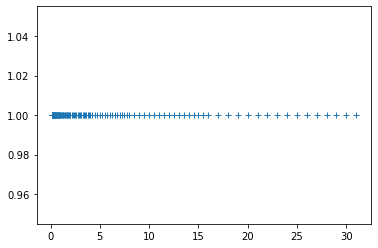

In [2]:
significand_bits = 4
exponent_min = -3
exponent_max = 4

fp_numbers = []
for exp in range(exponent_min, exponent_max+1):
    for sbits in range(0, 2**significand_bits):
        significand = 1 + sbits/2**significand_bits 
        fp_numbers.append(significand * 2**exp)
        
fp_numbers = np.array(fp_numbers)
print(fp_numbers)

pt.plot(fp_numbers, np.ones_like(fp_numbers), "+")
#pt.semilogx(fp_numbers, np.ones_like(fp_numbers), "+")
        

Relative gap size between consecutive floating point numbers. Notice that the maximum is achieved at $1$.

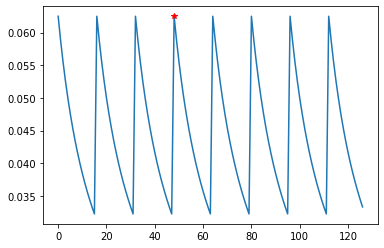

In [3]:
pt.plot(
    np.abs(fp_numbers[1:]-fp_numbers[:-1])
    / np.abs(fp_numbers[:-1]))

n_one = int(np.argwhere(np.abs(fp_numbers-1) < 1e-12))
pt.plot([n_one], np.abs(fp_numbers[n_one+1] - fp_numbers[n_one]), 'r*')

## What about subnormals?

[0.        0.0078125 0.015625  0.0234375 0.03125   0.0390625 0.046875
 0.0546875 0.0625    0.0703125 0.078125  0.0859375 0.09375   0.1015625
 0.109375  0.1171875]


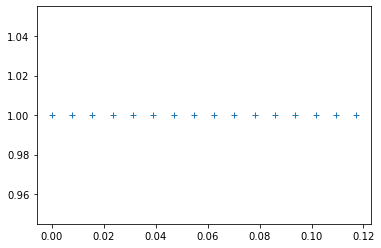

In [4]:
subnormals = []
exp = exponent_min
for sbits in range(0, 2**significand_bits):
    significand = sbits / 2**significand_bits
    subnormals.append(significand * 2**exp)
subnormals = np.array(subnormals)

print(subnormals)
pt.plot(subnormals, np.ones_like(subnormals), "+")

/tmp/ipykernel_64778/473821165.py:3: RuntimeWarning: divide by zero encountered in true_divide
  pt.plot(np.abs(fnws[1:]-fnws[:-1])/np.abs(fnws[:-1]))


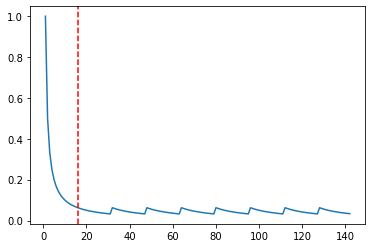

In [5]:
fnws = np.concatenate([subnormals, fp_numbers])

pt.plot(np.abs(fnws[1:]-fnws[:-1])/np.abs(fnws[:-1]))
pt.axvline(x=len(subnormals), color='r', linestyle='--')